Problem statement:
Understand how the student's test scores are affected by variables such as gender, ethnicity, etc.

### 0. Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [44]:
dataset = pd.read_csv('data/stud.csv')

In [3]:
dataset.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
dataset.shape

(1000, 8)

Dataset Information

In [5]:
for feature in dataset.columns:
    print(feature)

gender
race_ethnicity
parental_level_of_education
lunch
test_preparation_course
math_score
reading_score
writing_score


Data cleaning

Check for missing values

In [6]:
dataset.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
dataset.duplicated().sum()

np.int64(0)

Check data types

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Check unique values

In [9]:
dataset.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Check the statistics

In [10]:
dataset.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight
The score means are close to each other.
The standard deviations are also close to each other.
The minimum scores are lowest for math (0), followed by writing (10) then reading (17)

Explore the data

In [11]:
print("Categories in 'gender' variable: ", end=" ")
print(dataset['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end=" ")
print(dataset['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable: ", end=" ")
print(dataset['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end=" ")
print(dataset['lunch'].unique())

print("Categories in 'test_preparation_course' variable: ", end=" ")
print(dataset['test_preparation_course'].unique())

Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


Define numerical and categorical features

In [12]:
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O']
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O']

In [13]:
numerical_features

['math_score', 'reading_score', 'writing_score']

In [14]:
categorical_features

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [49]:
dataset['total_score'] = dataset['math_score'] + dataset['reading_score'] + dataset['writing_score']
dataset['average'] = dataset['total_score'] / 3

In [50]:
dataset

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,5,standard,none,72,72,74,218,72.666667
1,female,group C,3,standard,completed,69,90,88,247,82.333333
2,female,group B,6,standard,none,90,95,93,278,92.666667
3,male,group A,4,free/reduced,none,47,57,44,148,49.333333
4,male,group C,3,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,6,standard,completed,88,99,95,282,94.000000
996,male,group C,2,free/reduced,none,62,55,55,172,57.333333
997,female,group C,2,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,3,standard,completed,68,78,77,223,74.333333


In [17]:
math_full = dataset[dataset['math_score'] == 100]['average'].count()
reading_full = dataset[dataset['reading_score'] == 100]['average'].count()
writing_full = dataset[dataset['writing_score'] == 100]['average'].count()
print(f"Number of students with full marks in Math: {math_full}")
print(f"Number of students with full marks in Reading: {reading_full}")
print(f"Number of students with full marks in Writing: {writing_full}")

Number of students with full marks in Math: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [18]:
math_less_40 = dataset[dataset['math_score'] <= 20]['average'].count()
reading_less_40 = dataset[dataset['reading_score'] <= 20]['average'].count()
writing_less_40 = dataset[dataset['writing_score'] <= 20]['average'].count()
print(f"Number of students with scores less than 40 in Math: {math_less_40}")
print(f"Number of students with scores less than 40 in Reading: {reading_less_40}")
print(f"Number of students with scores less than 40 in Writing: {writing_less_40}")

Number of students with scores less than 40 in Math: 4
Number of students with scores less than 40 in Reading: 1
Number of students with scores less than 40 in Writing: 3


Explore the Data

<Axes: xlabel='average', ylabel='Count'>

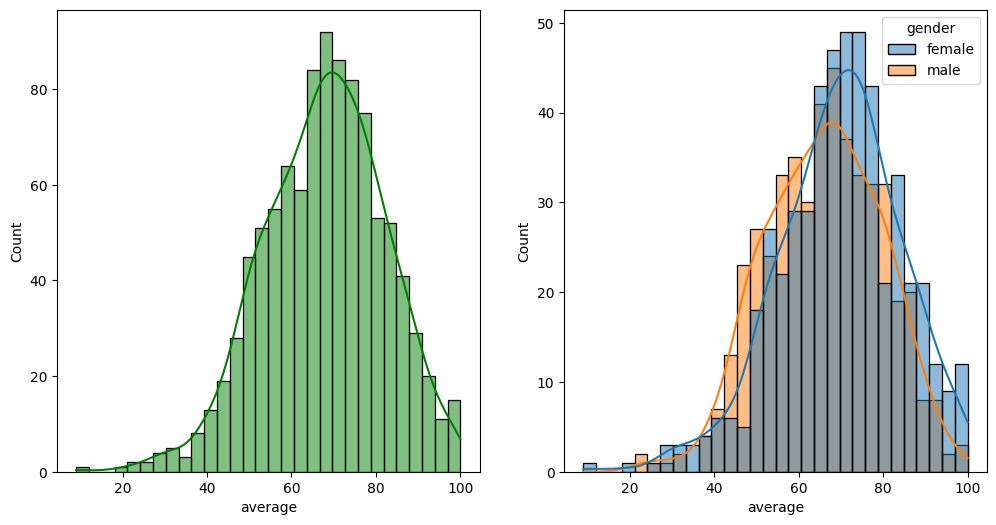

In [21]:
fig, axis = plt.subplots(1, 2, figsize=(12, 6))
plt.subplot(121)
sns.histplot(data=dataset, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=dataset, x='average', bins=30, kde=True, hue='gender')

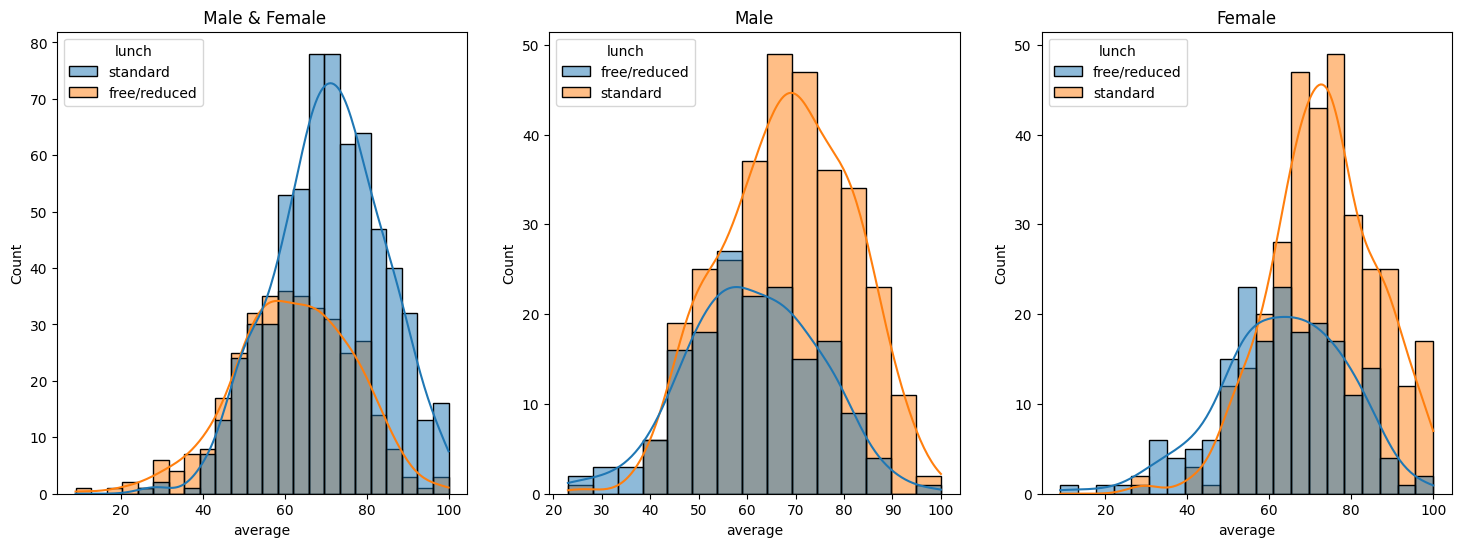

In [31]:
plt.subplots(1, 3, figsize=(18, 6))
plt.subplot(131).set_title(" Male & Female")
sns.histplot(data=dataset, x='average', kde=True, hue='lunch')
plt.subplot(132).set_title("Male")
sns.histplot(data=dataset[dataset.gender=='male'], x='average', kde=True, hue='lunch')
plt.subplot(133).set_title("Female")
sns.histplot(data=dataset[dataset.gender=='female'], x='average', kde=True, hue='lunch', hue_order=('free/reduced', 'standard'))
plt.show()

In [46]:
dataset['parental_level_of_education'] = dataset['parental_level_of_education'].map({'some high school':'1', 'high school': '2', 'some college': '3', 
                                                                                      "associate's degree": '4', "bachelor's degree": '5', "master's degree": '6'})

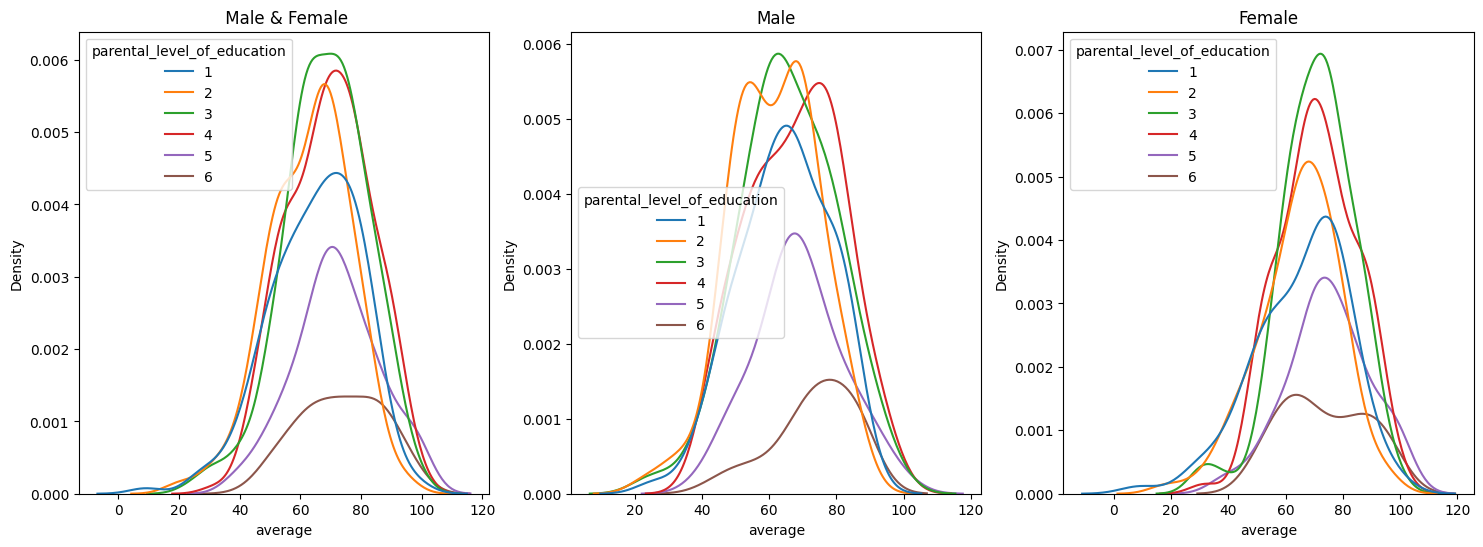

In [59]:
plt.subplots(1, 3, figsize=(18, 6))
plt.subplot(131).set_title(" Male & Female")
sns.kdeplot(data=dataset, x='average', hue='parental_level_of_education', hue_order=['1', '2', '3', '4', '5', '6'])
plt.subplot(132).set_title("Male")
sns.kdeplot(data=dataset[dataset.gender=='male'], x='average', hue='parental_level_of_education', hue_order=['1', '2', '3', '4', '5', '6'])
plt.subplot(133).set_title("Female")
sns.kdeplot(data=dataset[dataset.gender=='female'], x='average', hue='parental_level_of_education', hue_order=['1', '2', '3', '4', '5', '6'])
plt.show()

In [60]:
dataset['parental_level_of_education'] = dataset['parental_level_of_education'].map({'1': 'some high school', '2': 'high school', '3': 'some college', 
                                                                                      '4':"associate's degree", '5':"bachelor's degree", '6':"master's degree"})

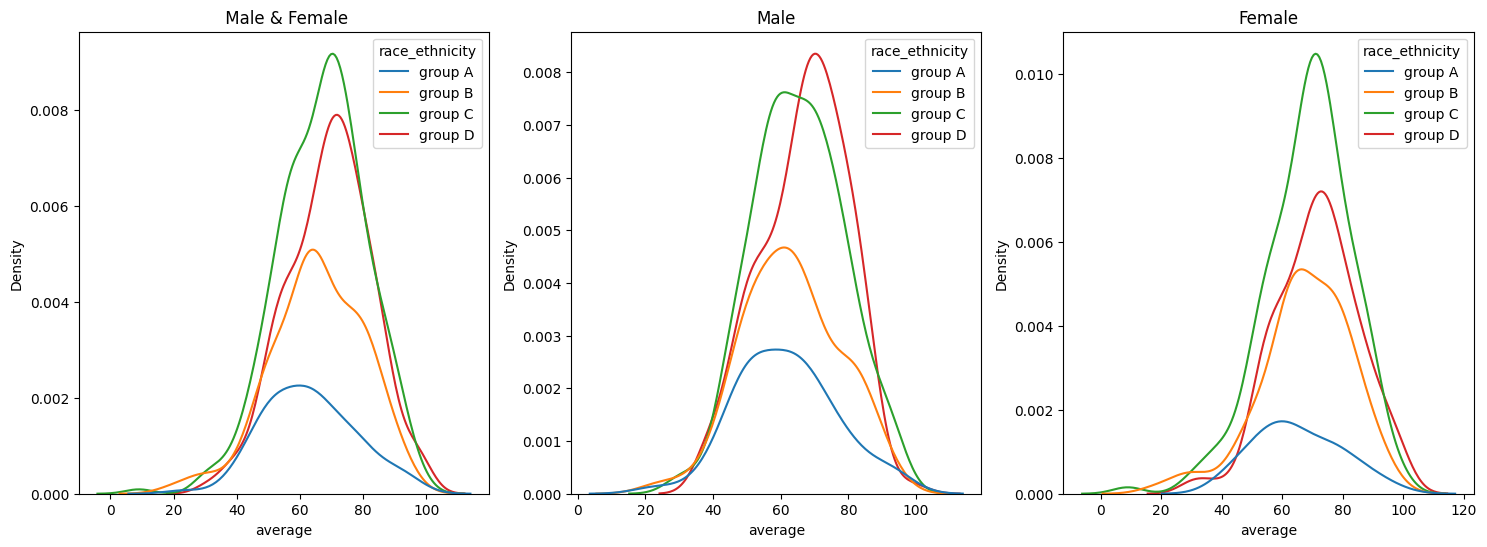

In [66]:
plt.subplots(1, 3, figsize=(18, 6))
plt.subplot(131).set_title(" Male & Female")
sns.kdeplot(data=dataset, x='average', hue='race_ethnicity', hue_order=('group A', 'group B', 'group C', 'group D'))
plt.subplot(132).set_title("Male")
sns.kdeplot(data=dataset[dataset.gender=='male'], x='average', hue='race_ethnicity', hue_order=('group A', 'group B', 'group C', 'group D'))
plt.subplot(133).set_title("Female")
sns.kdeplot(data=dataset[dataset.gender=='female'], x='average', hue='race_ethnicity', hue_order=('group A', 'group B', 'group C', 'group D'))
plt.show()

In [63]:
dataset

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


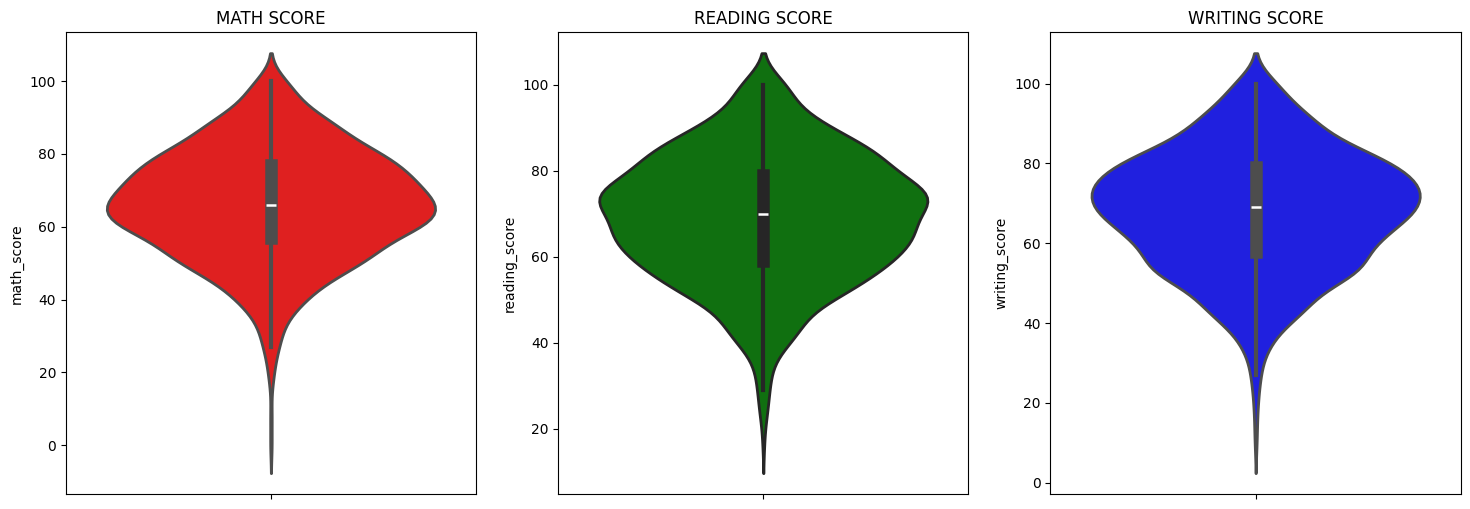

In [73]:
plt.subplots(1, 3, figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title('MATH SCORE')
sns.violinplot(y='math_score',data=dataset,color='red',linewidth=2)
plt.subplot(1, 3, 2)
plt.title('READING SCORE')
sns.violinplot(y='reading_score',data=dataset,color='green',linewidth=2)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing_score',data=dataset,color='blue',linewidth=2)
plt.show()

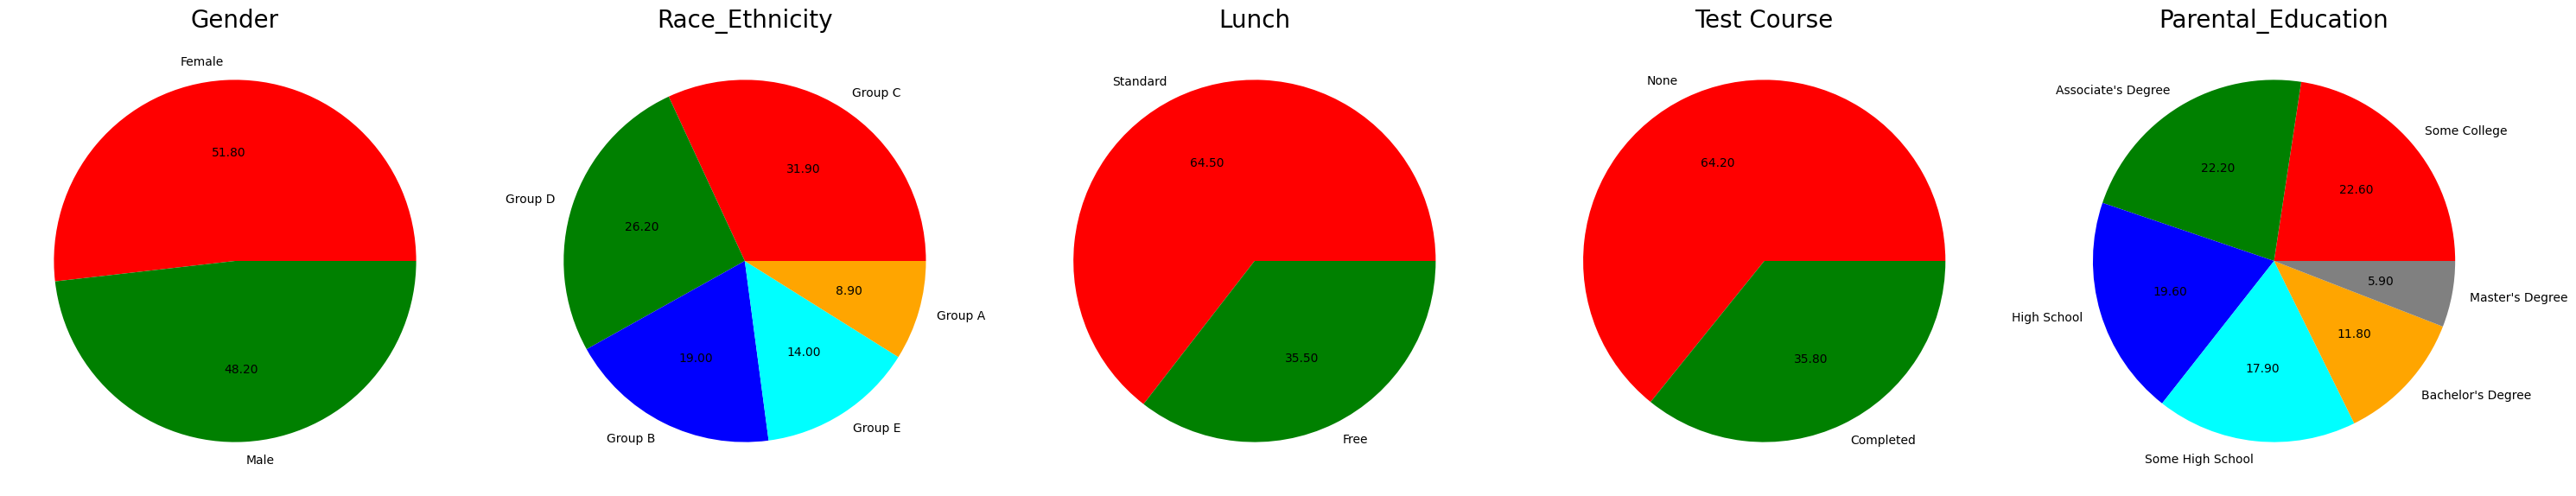

In [83]:
plt.rcParams['figure.figsize'] = (30, 6)

plt.subplot(1, 5, 1)
size = dataset['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%.2f')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = dataset['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = dataset['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = dataset['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = dataset['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%.2f')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

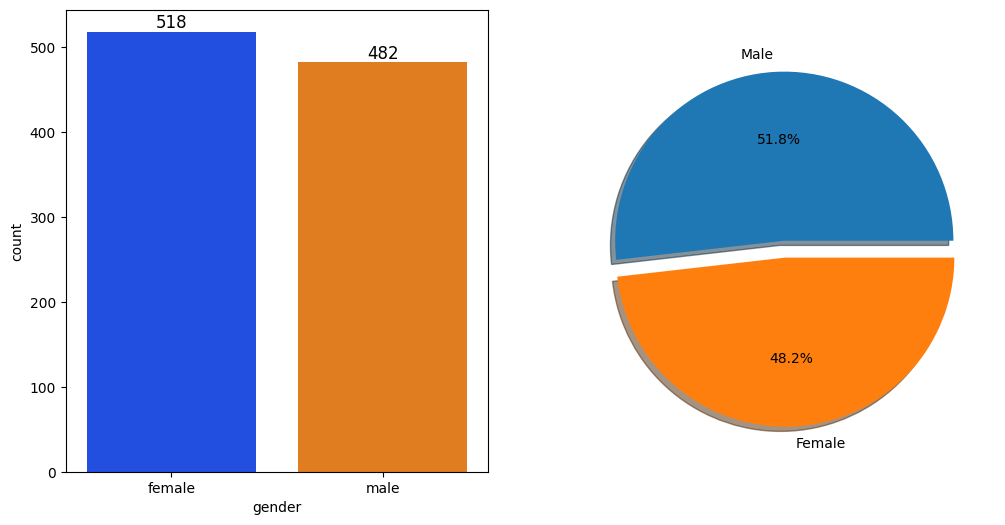

In [88]:
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=dataset['gender'],data=dataset,palette ='bright',ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=12)
    
plt.pie(x=dataset['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

In [96]:
group_data=dataset.groupby('race_ethnicity')

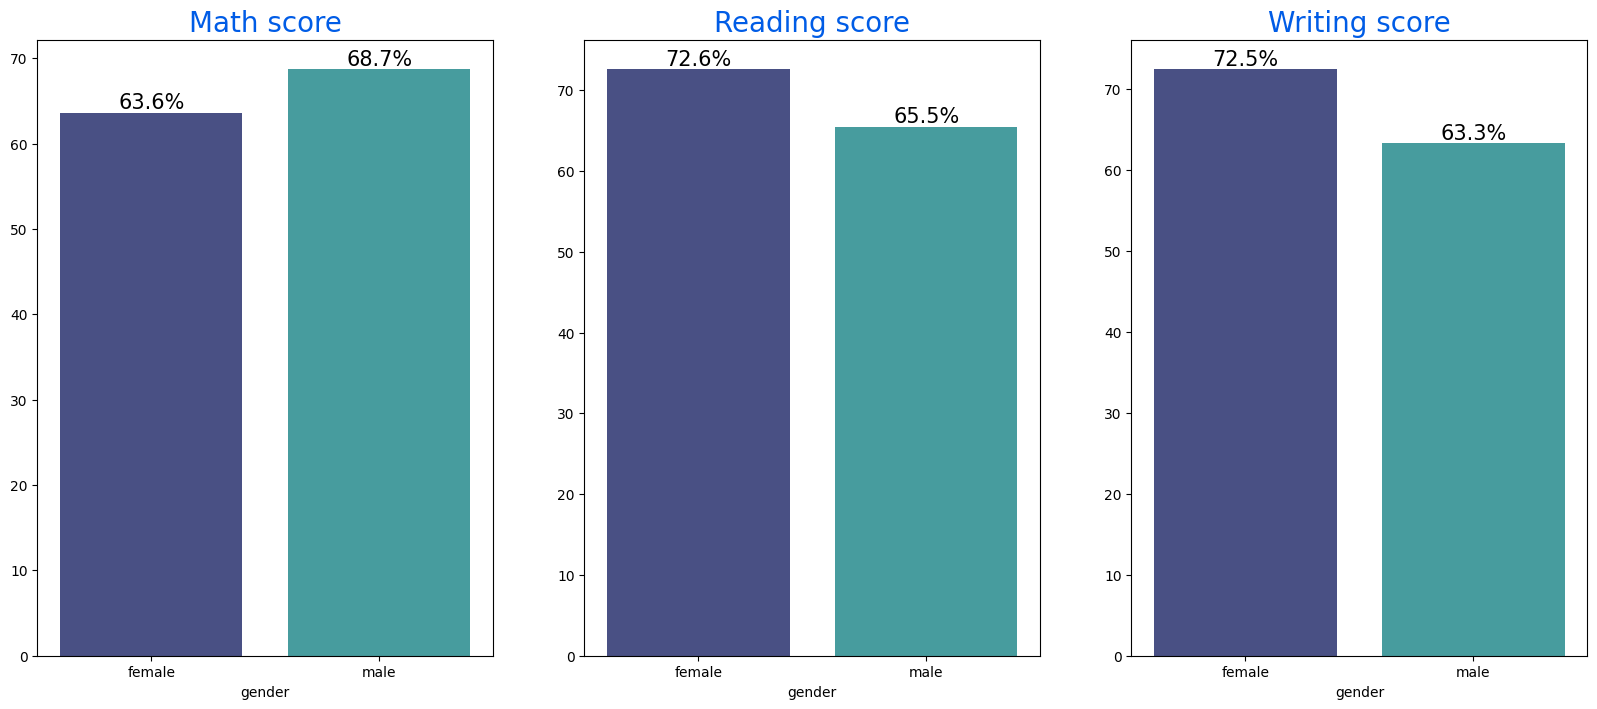

In [120]:
group_data=dataset.groupby('gender')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data['math_score'].mean().index,y=group_data['math_score'].mean().values, palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15, fmt='%1.1f%%')

sns.barplot(x=group_data['reading_score'].mean().index,y=group_data['reading_score'].mean().values,palette = 'mako',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15, fmt='%1.1f%%')

sns.barplot(x=group_data['writing_score'].mean().index,y=group_data['writing_score'].mean().values,palette = 'mako',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15, fmt='%1.1f%%')

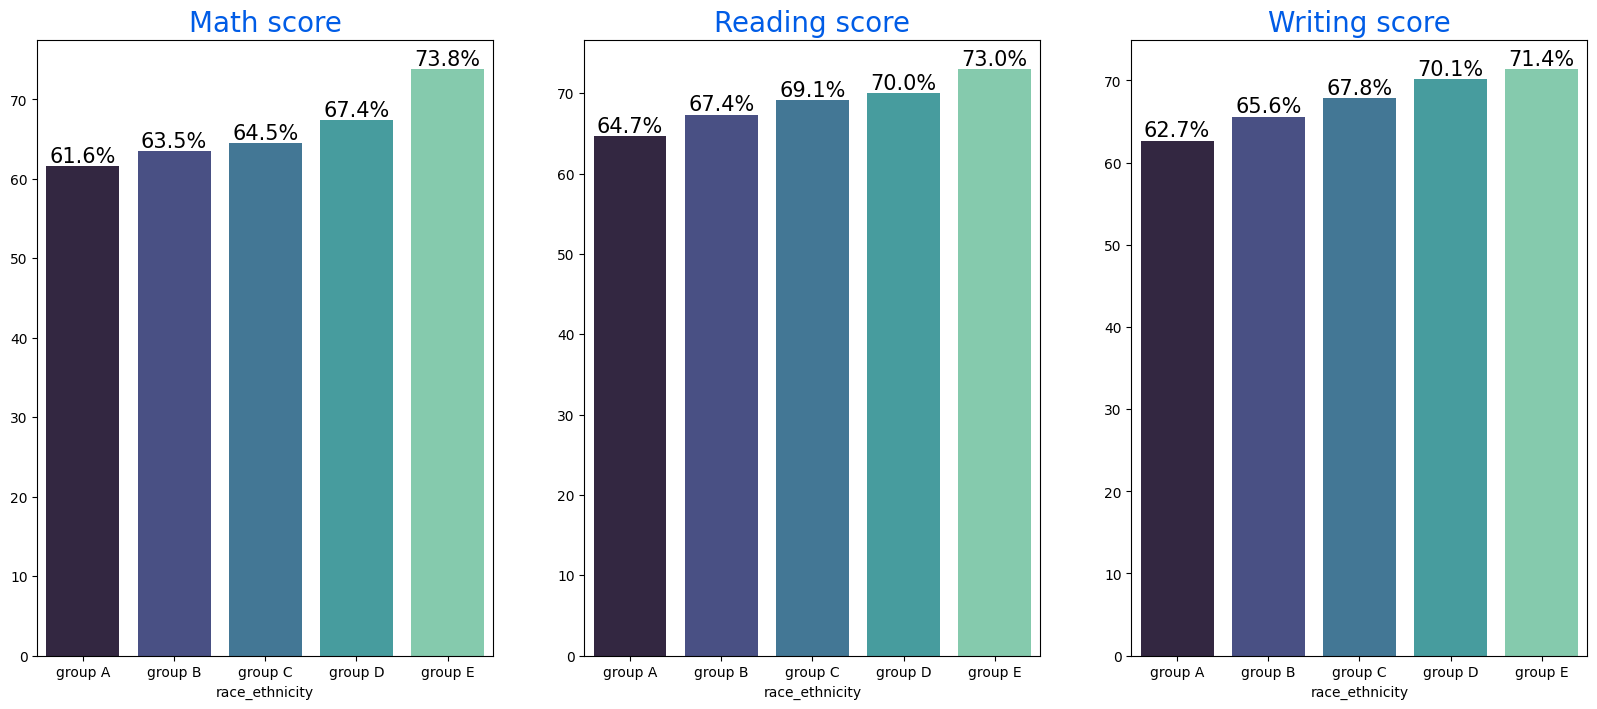

In [119]:
group_data=dataset.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data['math_score'].mean().index,y=group_data['math_score'].mean().values, palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15, fmt='%1.1f%%')

sns.barplot(x=group_data['reading_score'].mean().index,y=group_data['reading_score'].mean().values,palette = 'mako',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15, fmt='%1.1f%%')

sns.barplot(x=group_data['writing_score'].mean().index,y=group_data['writing_score'].mean().values,palette = 'mako',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15, fmt='%1.1f%%')

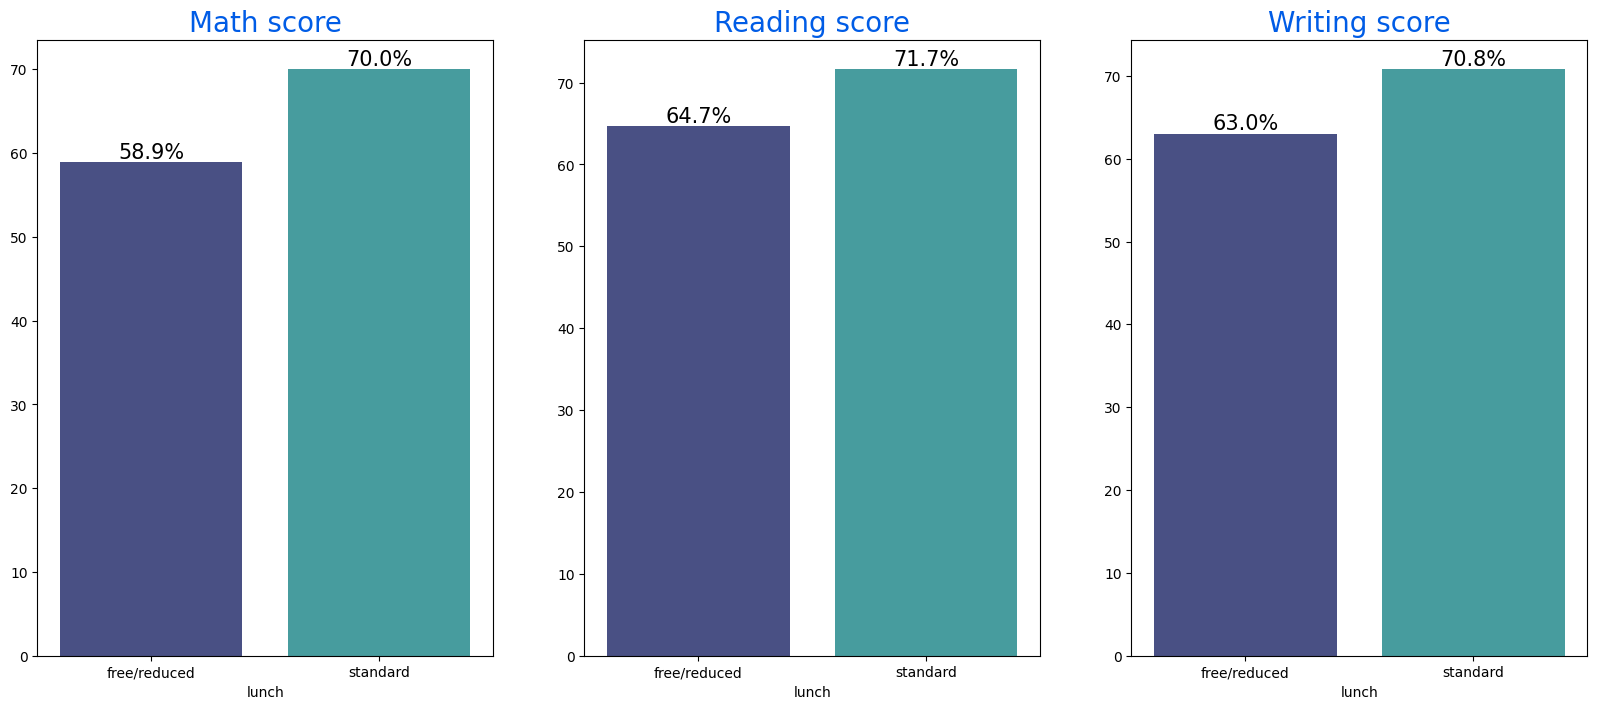

In [130]:
group_data=dataset.groupby('lunch')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data['math_score'].mean().index,y=group_data['math_score'].mean().values, palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15, fmt='%1.1f%%')

sns.barplot(x=group_data['reading_score'].mean().index,y=group_data['reading_score'].mean().values,palette = 'mako',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15, fmt='%1.1f%%')

sns.barplot(x=group_data['writing_score'].mean().index,y=group_data['writing_score'].mean().values,palette = 'mako',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15, fmt='%1.1f%%')

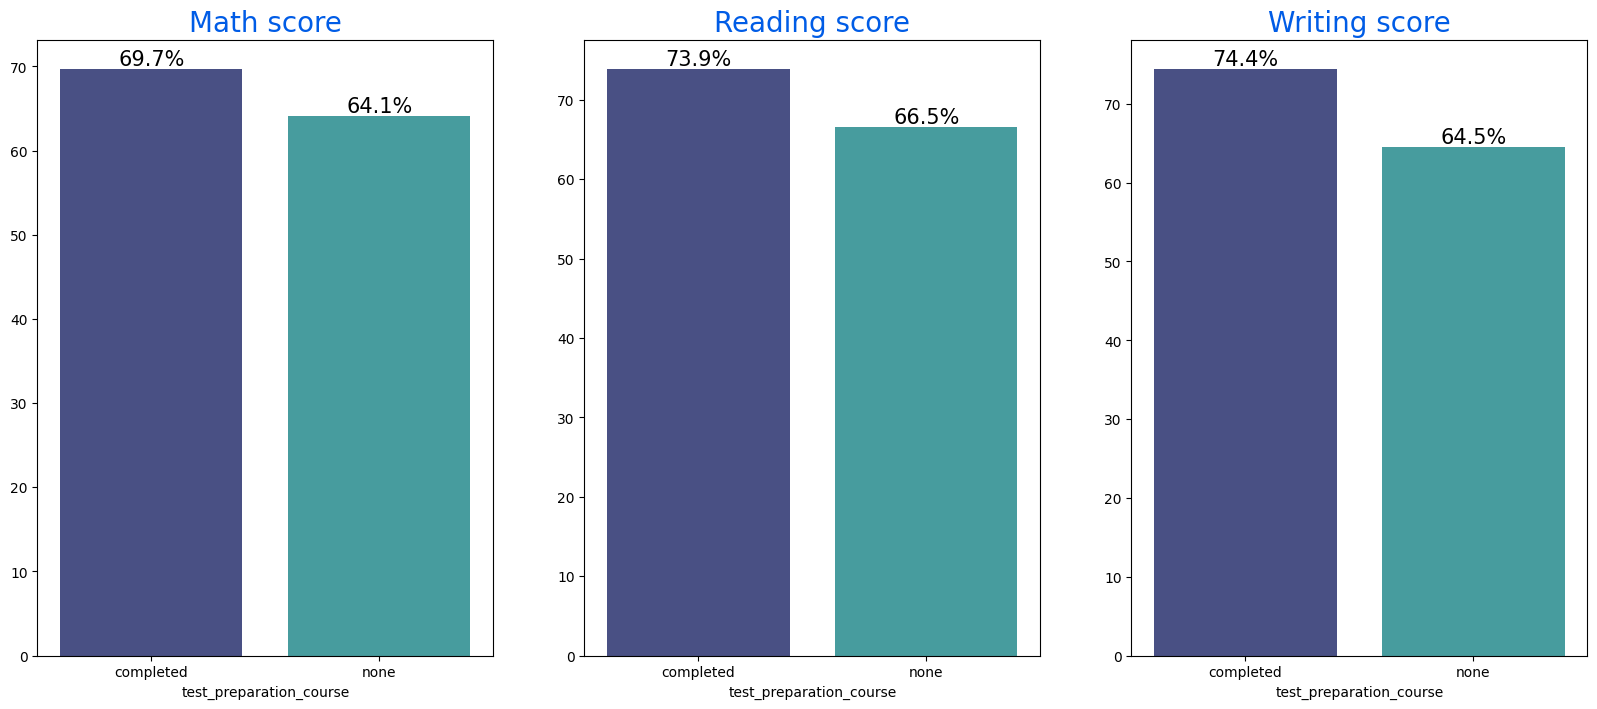

In [131]:
group_data=dataset.groupby('test_preparation_course')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data['math_score'].mean().index,y=group_data['math_score'].mean().values, palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15, fmt='%1.1f%%')

sns.barplot(x=group_data['reading_score'].mean().index,y=group_data['reading_score'].mean().values,palette = 'mako',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15, fmt='%1.1f%%')

sns.barplot(x=group_data['writing_score'].mean().index,y=group_data['writing_score'].mean().values,palette = 'mako',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15, fmt='%1.1f%%')

In [125]:
dataset['parental_level_of_education'] = dataset['parental_level_of_education'].map({'some high school':'1', 'high school': '2', 'some college': '3', 
                                                                                      "associate's degree": '4', "bachelor's degree": '5', "master's degree": '6'})

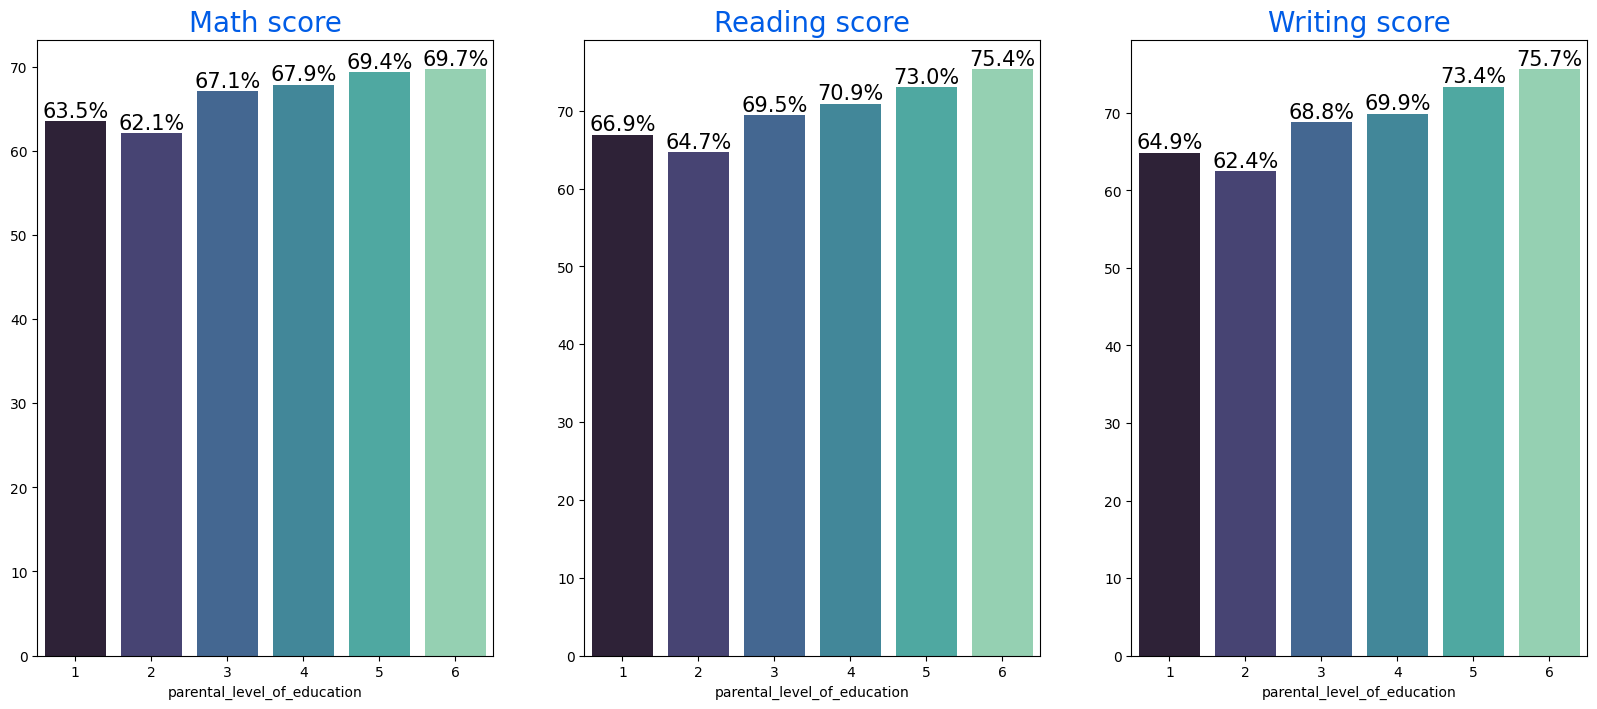

In [126]:
group_data=dataset.groupby('parental_level_of_education')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=group_data['math_score'].mean().index,y=group_data['math_score'].mean().values, palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15, fmt='%1.1f%%')

sns.barplot(x=group_data['reading_score'].mean().index,y=group_data['reading_score'].mean().values,palette = 'mako',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15, fmt='%1.1f%%')

sns.barplot(x=group_data['writing_score'].mean().index,y=group_data['writing_score'].mean().values,palette = 'mako',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15, fmt='%1.1f%%')

In [127]:
dataset['parental_level_of_education'] = dataset['parental_level_of_education'].map({'1': 'some high school', '2': 'high school', '3': 'some college', 
                                                                                      '4':"associate's degree", '5':"bachelor's degree", '6':"master's degree"})

Checking Outliers

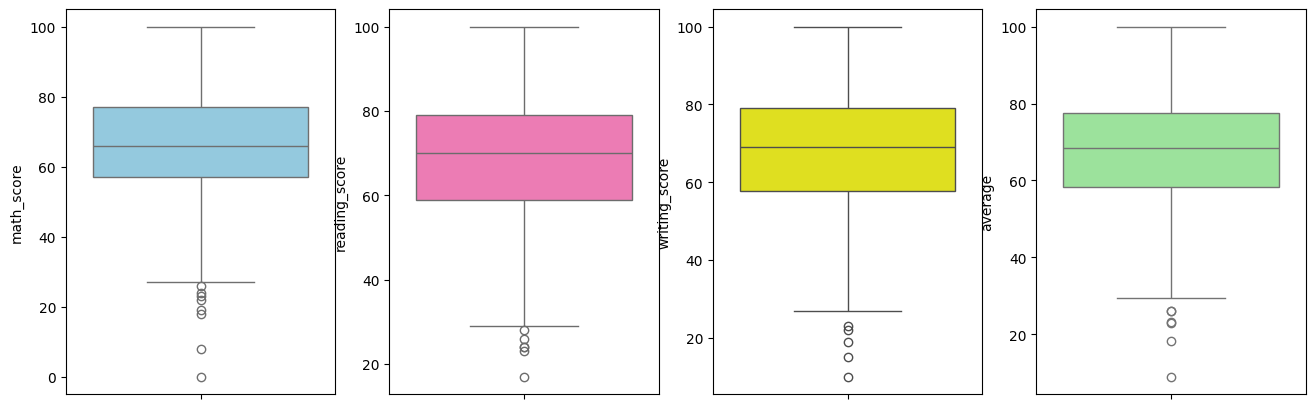

In [134]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(dataset['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(dataset['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(dataset['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(dataset['average'],color='lightgreen')
plt.show()

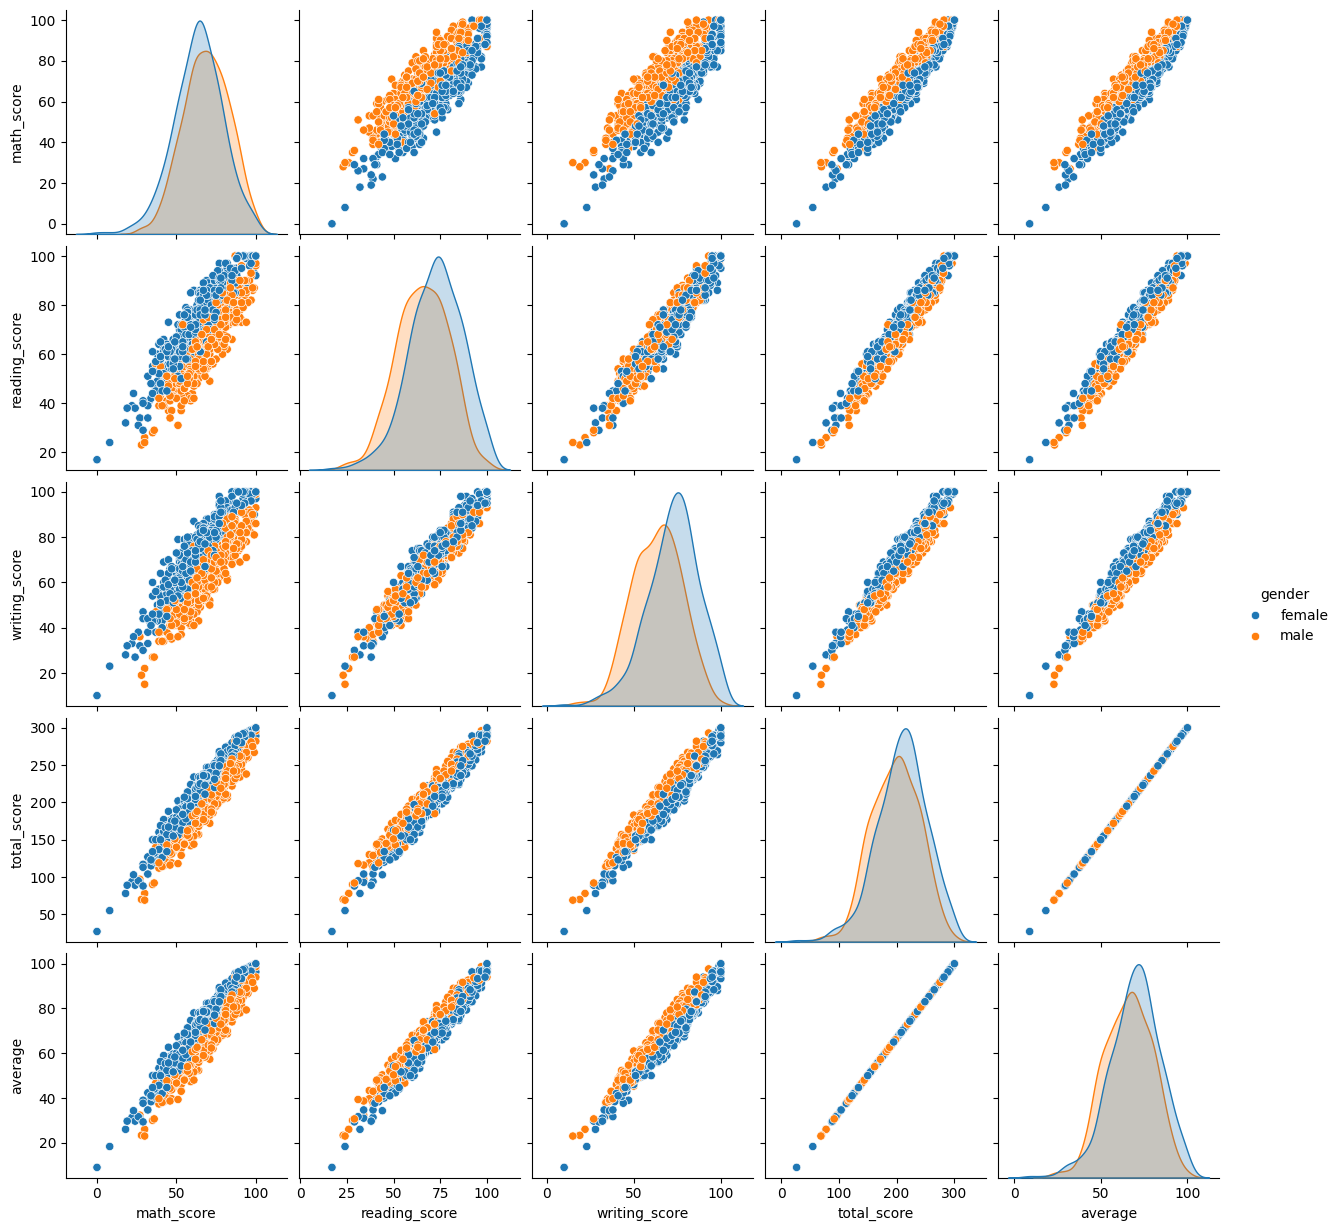

In [135]:
sns.pairplot(dataset,hue = 'gender')
plt.show()